In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
%matplotlib inline

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


631

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

updatedcities = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lon = []
country = []
date = []

 # Save config information.
units = "&units=imperial"

# Build partial query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q="

for city in cities:
    response = requests.get(query_url + city + units).json()
    updatedcities.append(city)
    try:
        temperature.append(response["main"]["temp_max"])
    except (KeyError):
        updatedcities.remove(city)     
    try:
        country.append(response["sys"]["country"])
    except (KeyError):
        pass
    try:
        date.append(response["dt"])
    except (KeyError):
        pass
    try:
        humidity.append(response["main"]["humidity"])
    except (KeyError):
        pass
    try:
        cloudiness.append(response["clouds"]["all"])
    except (KeyError):
        pass
    try:
        windspeed.append(response["wind"]["speed"])
    except (KeyError):
        pass
    try:
        lat.append(response["coord"]["lat"])
    except (KeyError):
        pass
    try:
        lon.append(response["coord"]["lon"])
    except (KeyError):
        pass

In [5]:
DFcities = pd.DataFrame(updatedcities)
DFcities = DFcities.rename(columns={0:"City"})
DFcities["Cloudiness (%)"] = cloudiness
DFcities["Country"] = country
DFcities["Date"] = date
DFcities["Humidity (%)"] = humidity
DFcities["Lat"] = lat
DFcities["Lng"] = lon
DFcities["Max Temp (F)"] = temperature
DFcities["Cloudiness (%)"] = cloudiness
DFcities["Wind Speed (mph)"] = windspeed

DFcities.to_csv("output/output_data.csv", index=False, header=True)


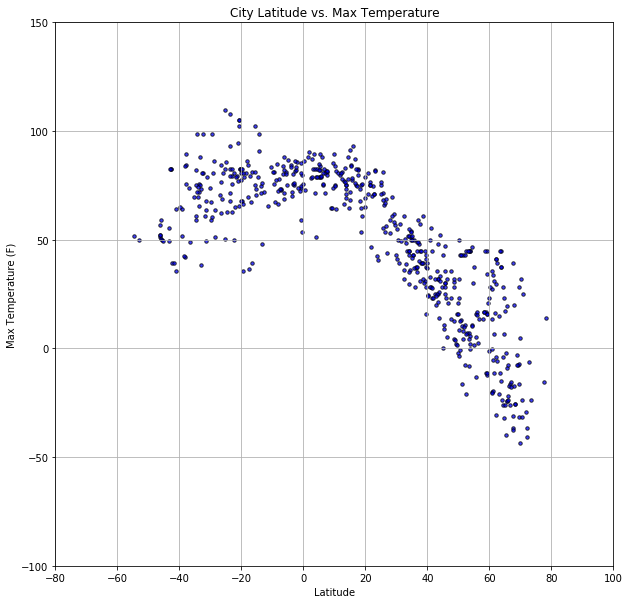

In [10]:
plt.grid()

plt.rcParams["figure.figsize"] = [10,10]

plt.scatter(DFcities["Lat"], DFcities["Max Temp (F)"], alpha=.75, s = 12, edgecolors='black',c="blue")

plt.xlabel('Latitude')           
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')

plt.xlim(-80,100)
plt.ylim(-100,150)

plt.savefig("output/Latvstemp.png")


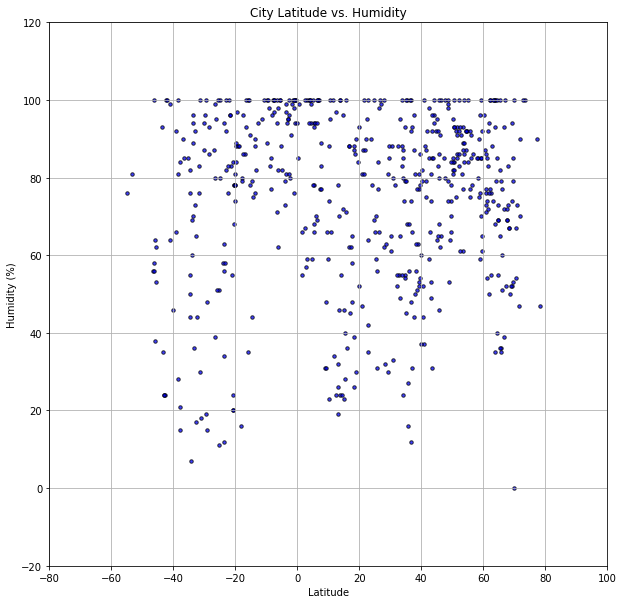

In [7]:
plt.grid()
plt.rcParams["figure.figsize"] = [10,10]

plt.scatter(DFcities["Lat"], DFcities["Humidity (%)"], alpha=.75, s = 12, edgecolors='black',c="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.savefig("output/Latvshum.png")

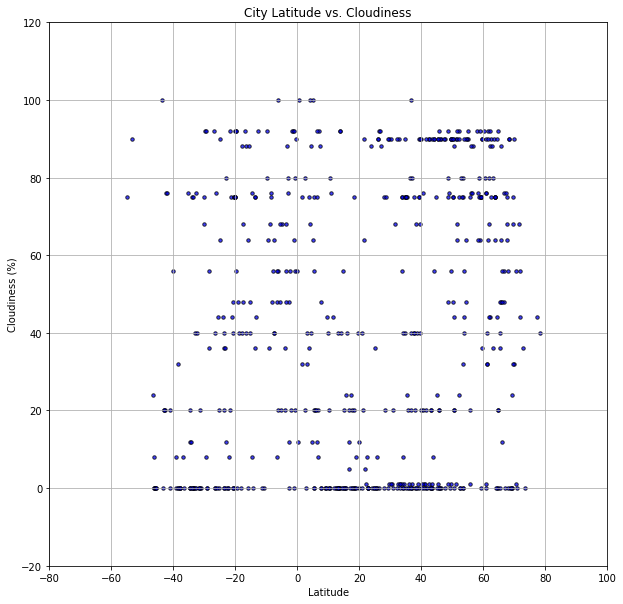

In [8]:
plt.grid()
plt.rcParams["figure.figsize"] = [10,10]

plt.scatter(DFcities["Lat"], DFcities["Cloudiness (%)"], alpha=.75, s = 12, edgecolors='black',c="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

plt.xlim(-80,100)
plt.ylim(-20,120)

plt.savefig("output/Latvscloud.png")

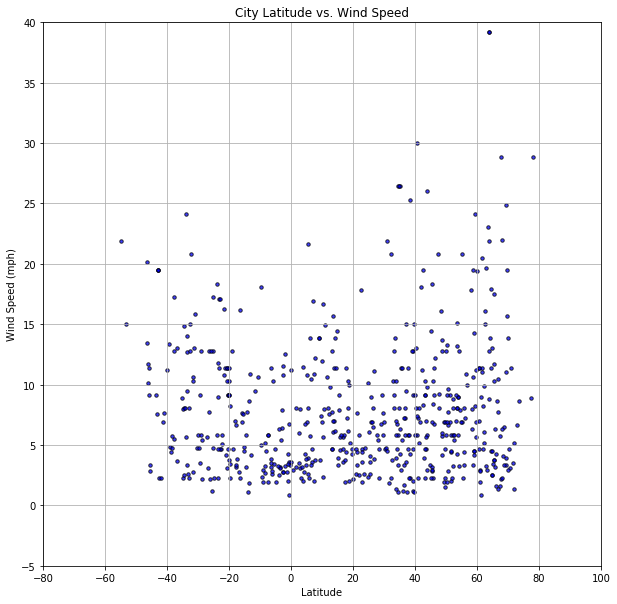

In [9]:
plt.grid()

plt.rcParams["figure.figsize"] = [10,10]
plt.scatter(DFcities["Lat"], DFcities["Wind Speed (mph)"], alpha=.75, s = 12, edgecolors='black',c="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')


plt.xlim(-80,100)
plt.ylim(-5,40)

plt.savefig("output/Latvswindspd.png")